In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
def correlation_matrix_ss(x):
    """
    Compute the correlation matrix of a matrix x, where each row is a
    sample and each column is a variable.
    """
    # Compute the covariance matrix
    cov = np.cov(x, rowvar=0)
    # Compute the standard deviation of each variable
    std = np.std(x, axis=0)
    # Compute the correlation matrix
    corr = cov / np.outer(std, std)
    return corr

In [3]:
def plot_correlation_matrix(corr):
    """
    Plot the correlation matrix of pandas dataset.
    """
    import matplotlib.pyplot as plt
    plt.imshow(corr,interpolation='nearest')
    plt.xticks(np.arange(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(np.arange(len(corr.columns)), corr.columns)
    plt.colorbar()
    plt.show()

In [4]:
### Indices for column names
indices = tree_stats_idx = {
    "max_H": 0,
    "min_H": 1,
    "a_BL_mean": 2,
    "a_BL_median": 3,
    "a_BL_var": 4,
    "e_BL_mean": 5,
    "e_BL_median": 6,
    "e_BL_var": 7,
    "i_BL_mean_1": 8,
    "i_BL_median_1": 9,
    "i_BL_var_1": 10,
    "ie_BL_mean_1": 11,
    "ie_BL_median_1": 12,
    "ie_BL_var_1": 13,
    "i_BL_mean_2": 14,
    "i_BL_median_2": 15,
    "i_BL_var_2": 16,
    "ie_BL_mean_2": 17,
    "ie_BL_median_2": 18,
    "ie_BL_var_2": 19,
    "i_BL_mean_3": 20,
    "i_BL_median_3": 21,
    "i_BL_var_3": 22,
    "ie_BL_mean_3": 23,
    "ie_BL_median_3": 24,
    "ie_BL_var_3": 25,
    "colless": 26,
    "sackin": 27,
    "WD_ratio": 28,
    "delta_w": 29,
    "max_ladder": 30,
    "IL_nodes": 31,
    "staircaseness_1": 32,
    "staircaseness_2": 33,
    "tree_size": 34,
}
allele_stats_indices = {
    'pi':0, ## Sequence diversity
    'theta_w':1,
    'tajimas_d':2,
    'f_st':3,
    'f_is':4,
    'entropy':5,
    'delta_gc_content':6,
    'n_segregating_sites':7,
    'n_variants':8,
    'n_haplotypes':9,
    'h1':10,
    'h12':11,
    'h123':12,
    'h2_h1':13,
    'haplotype_diversity':14,
    'allele_freq_max':15,
    'allele_freq_min':16,
    'allele_freq_mean':17,
    'allele_freq_median':18,
    'allele_freq_var':19,
    'ihs':20,
}
##Add allele related stats
indices.update({key: len(tree_stats_idx) + idx for key, idx in allele_stats_indices.items()})

indices.update({
    "n_individuals" : 56 ,
    "mutation_rate" : 57,
    "n_generations" : 58,
    "max_mutations" : 59
})

In [319]:
#path_ss = "/Users/berk/Projects/jlees/data/plots/20230509-0906/simulation_results.npy"
path_ss = "/Users/berk/Projects/jlees/data/codon_outputs/streptococcus/strepto_10000_results.csv.gz"
#data_ss = np.load(path_ss)
#pd_ss = pd.DataFrame(data_ss, columns=indices.keys())
new_pd_ss = pd.read_csv(path_ss)

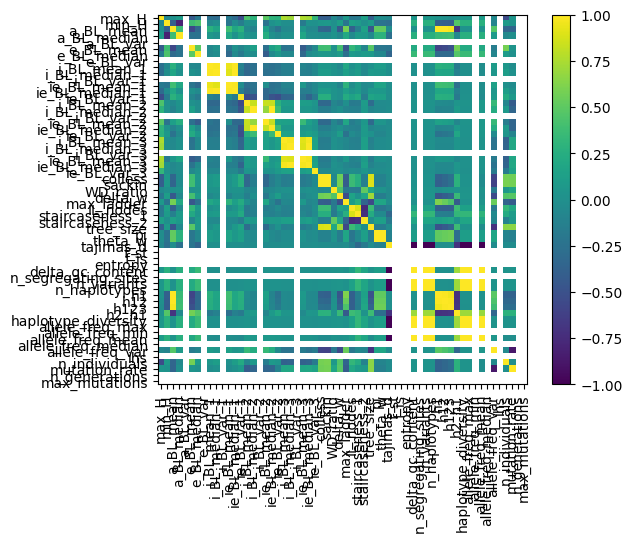

In [320]:
plot_correlation_matrix(new_pd_ss.corr())

In [100]:
pd_ss.describe()

,max_H,min_H,a_BL_mean,a_BL_median,a_BL_var,e_BL_mean,e_BL_median,e_BL_var,i_BL_mean_1,i_BL_median_1,...,allele_freq_max,allele_freq_min,allele_freq_mean,allele_freq_median,allele_freq_var,ihs,n_individuals,mutation_rate,n_generations,max_mutations
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.0,1.000000e+04,1.000000e+04,10000.0,1.000000e+04,10000.000000,...,10000.000000,10000.0,10000.000000,10000.0,10000.000000,3.0,10000.000000,10000.000000,10000.0,10000.0
mean,1.382726e-06,2.374589e-07,4.093409e-07,2.396226e-07,0.0,4.607201e-07,4.755020e-07,0.0,1.516533e-06,0.000001,...,0.999700,0.0,0.001994,0.0,0.000747,0.0,496.587400,0.496152,50.0,500.0
std,4.345751e-07,1.506090e-08,3.057312e-07,1.579230e-08,0.0,3.601622e-08,2.380563e-08,0.0,6.003883e-06,0.000006,...,0.017319,0.0,0.000035,0.0,0.000509,0.0,288.823788,0.287346,0.0,0.0
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.000000,0.000033,50.0,500.0
25%,1.251698e-06,2.384186e-07,2.980232e-07,2.384186e-07,0.0,4.768372e-07,4.768372e-07,0.0,1.192093e-07,0.000000,...,1.000000,0.0,0.001996,0.0,0.000311,0.0,246.000000,0.245295,50.0,500.0
50%,1.251698e-06,2.384186e-07,2.980232e-07,2.384186e-07,0.0,4.768372e-07,4.768372e-07,0.0,1.788139e-07,0.000000,...,1.000000,0.0,0.001996,0.0,0.000600,0.0,497.000000,0.493323,50.0,500.0
75%,1.728535e-06,2.384186e-07,4.172325e-07,2.384186e-07,0.0,4.768372e-07,4.768372e-07,0.0,4.172325e-07,0.000000,...,1.000000,0.0,0.001996,0.0,0.001115,0.0,747.000000,0.742000,50.0,500.0
max,4.887581e-06,2.384186e-07,6.794930e-06,4.768372e-07,0.0,4.768372e-07,4.768372e-07,0.0,3.302097e-05,0.000033,...,1.000000,0.0,0.001996,0.0,0.001992,0.0,999.000000,0.999969,50.0,500.0


In [118]:
pd_ss = pd_ss.drop_duplicates()

In [ ]:
"""pd_ss.drop(columns=[
    "entropy", "a_BL_median", "a_BL_var", "e_BL_median", "f_is", "f_st", "i_BL_mean_1",
    "i_BL_median_1", "i_BL_var_1", "ie_BL_var_1", "ie_BL_var_2",
    "ihs", "n_segregating_sites",
], inplace=True)"""

In [162]:
### We do not want to use these parameters
pd_ss.drop(
    columns=[
        "max_mutations",
        "n_generations"
    ], inplace=True)


In [163]:
### Drop row if all 0.0s
rows_dropped = pd_ss.iloc[:,:-2].any(axis=1)
pd_ss = pd_ss.loc[rows_dropped, :]

In [164]:
### Drop column if all 0.0s
cols_dropped = pd_ss.any(axis=0)
pd_ss = pd_ss.loc[:,cols_dropped]

In [165]:
pd_ss.replace([np.inf, -np.inf], np.nan, inplace=True)

In [166]:
pd_ss = pd_ss.dropna(axis=1, how="all")

In [167]:
### Drop columns are mostly nans
column_na_freq_fltr = pd_ss.isnull().sum()/max(pd_ss.count()) > 0.4
pd_ss.drop(columns=pd_ss.loc[:, column_na_freq_fltr].columns, inplace=True)

In [ ]:
pd_ss.isnull().sum()

In [ ]:
pd_ss.cov().plot()

In [ ]:
pd_ss.kurtosis().plot()

In [ ]:
pd_ss.var()

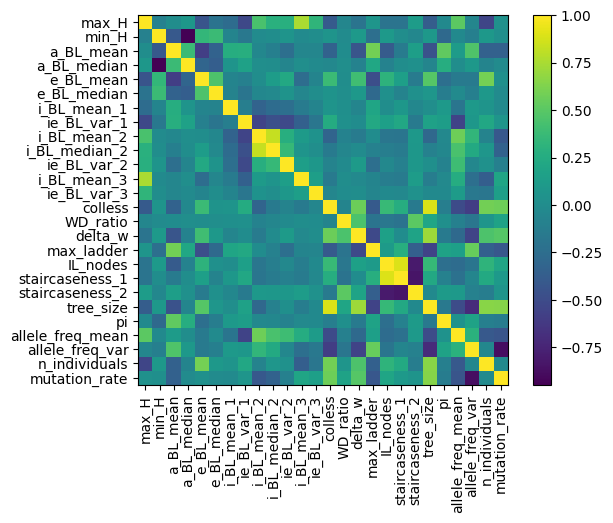

In [318]:
plot_correlation_matrix(pd_ss.corr())

In [160]:
### Drop columns that have no variance
np.isclose(pd_ss.var(), 0).sum()

14

In [ ]:
pd_ss.corr()

In [ ]:
### Deal with high correlations
pd_features = pd_ss.iloc[:,:-2]
# Compute the correlation matrix
corr_matrix = pd_features.corr().abs()

# Set the threshold for high correlation
corr_threshold = 0.95

# Get the upper triangular matrix
upper_triangular = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with high correlation
high_corr_features = {column for column in upper_triangular.columns if any(upper_triangular[column] > corr_threshold)}


In [ ]:
# Remove features with high correlation
pd_ss = pd_ss.drop(high_corr_features, axis=1)

In [ ]:
!pip install statsmodels

In [ ]:
### Variance Inflation Factor --> Multicollinearity
### https://github.com/statsmodels/statsmodels/issues/2376
"""
Seems the package cannot calculate it properly
"""
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(pd_features.dropna())

#high_vif_features = {c for i, c in enumerate(X.columns) if variance_inflation_factor(X.values, i) > 100}
high_vif_features = {c:variance_inflation_factor(X.values, i) for i, c in enumerate(X.columns)}

In [4]:
### Fill or drop na
### Drop all rows containing na for now

pd_naless = pd_ss.dropna(axis=0, how="any")

In [31]:
pd_norm = pd_naless

In [174]:
#### SAVEEE
pd_ss.to_csv("/Users/berk/Projects/jlees/data/cleaned2_data.csv", index=False)

In [3]:
### LOAD
pd_ss = pd.read_csv("/Users/berk/Projects/jlees/data/cleaned_data.csv")

In [125]:
### Normalise the data Only features
from sklearn.preprocessing import MinMaxScaler
pd_norm_features = pd.DataFrame(MinMaxScaler().fit_transform(pd_naless.iloc[:,:-2]), columns=pd_naless.columns[:-2])
pd_norm = pd_norm_features.merge(pd_naless.iloc[:,-2:], how="inner", left_index=True, right_index=True)

In [175]:
### Normalise all the data
from sklearn.preprocessing import MinMaxScaler
my_scaler = MinMaxScaler().fit(pd_naless)
_data = my_scaler.transform(pd_naless)
pd_norm = pd.DataFrame(_data)

In [5]:
from sklearn.preprocessing import MaxAbsScaler
my_scaler = MaxAbsScaler().fit(pd_naless)
_data= my_scaler.transform(pd_naless)
pd_norm=pd.DataFrame(_data)

In [200]:
np.isclose(pd_norm.var(),0).sum()

0

In [126]:
### Identify features that have 0 variance
cols_with_0_var = np.isclose(pd_norm.var(),0)
filtering_cols = ~cols_with_0_var


In [116]:
###pd_ss = pd_ss.iloc[:, filtering_cols]

IndexError: Boolean index has wrong length: 46 instead of 32

In [ ]:
##pd_norm = pd_norm.iloc[:,filtering_cols]

In [111]:
### Deal with high correlations
pd_features = pd_norm.iloc[:,:-2]
# Compute the correlation matrix
corr_matrix = pd_features.corr().abs()

# Set the threshold for high correlation
corr_threshold = 0.95

# Get the upper triangular matrix
upper_triangular = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with high correlation
high_corr_features = {column for column in upper_triangular.columns if any(upper_triangular[column] > corr_threshold)}


/opt/anaconda3/envs/elfi/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


In [142]:
colums_id_dict = {i:c for i,c in enumerate(pd_ss.columns)}

array([32, 33, 34, 35, 40, 41])

In [156]:
cols_with_0_var_set = {colums_id_dict[col] for col in cols_with_0_var.nonzero()[0]}

In [129]:
high_corr_features = [colums_id_dict[c_id] for c_id in high_corr_features]

KeyError: 'h123'

In [157]:
features_to_drop = list(cols_with_0_var_set.union(high_corr_features))

In [158]:
pd_ss = pd_ss.drop(features_to_drop, axis=1)


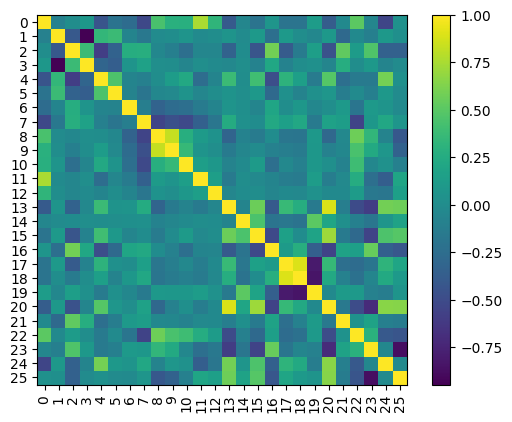

In [8]:
plot_correlation_matrix(pd_norm.corr())

In [310]:
pd_ss.corr()

,max_H,min_H,a_BL_mean,a_BL_median,e_BL_mean,e_BL_median,i_BL_mean_1,ie_BL_var_1,i_BL_mean_2,i_BL_median_2,...,max_ladder,IL_nodes,staircaseness_1,staircaseness_2,tree_size,pi,allele_freq_mean,allele_freq_var,n_individuals,mutation_rate
max_H,1.000000,-0.095313,0.003610,0.082818,-0.440909,-0.209007,-0.261824,-0.525319,0.440155,0.292392,...,0.070780,-0.200244,-0.196511,0.129787,-0.371331,-0.025163,0.512665,-0.054160,-0.536960,0.037809
min_H,-0.095313,1.000000,-0.406186,-0.947692,0.340797,0.383224,-0.068112,-0.166459,-0.007124,0.004420,...,-0.232750,0.101164,0.007571,-0.044196,0.089445,-0.282584,-0.020655,-0.110011,0.088658,0.024150
a_BL_mean,0.003610,-0.406186,1.000000,0.377488,-0.587654,-0.334249,0.268401,0.275346,-0.048948,-0.106068,...,0.582515,-0.387117,-0.140401,0.142908,-0.454515,0.524257,0.122817,0.461886,-0.341285,-0.345874
a_BL_median,0.082818,-0.947692,0.377488,1.000000,-0.314472,-0.363035,0.058763,0.167450,0.016791,0.004538,...,0.213579,-0.080402,0.005925,0.033704,-0.059338,0.265524,0.005267,0.089825,-0.066005,-0.009121
e_BL_mean,-0.440909,0.340797,-0.587654,-0.314472,1.000000,0.456753,-0.071847,-0.099374,0.006901,0.128647,...,-0.476147,0.307727,0.149803,-0.134182,0.484356,-0.238057,-0.153258,-0.151591,0.594554,0.031405
e_BL_median,-0.209007,0.383224,-0.334249,-0.363035,0.456753,1.000000,-0.077189,-0.191430,-0.043125,-0.028330,...,-0.279996,0.030906,-0.074284,0.029158,0.078494,-0.125487,-0.017984,-0.104789,0.091343,-0.008367
i_BL_mean_1,-0.261824,-0.068112,0.268401,0.058763,-0.071847,-0.077189,1.000000,-0.117800,-0.325455,-0.262758,...,0.199293,0.003341,0.084638,-0.044880,0.013780,0.109604,-0.193163,0.096669,0.061036,-0.018384
ie_BL_var_1,-0.525319,-0.166459,0.275346,0.167450,-0.099374,-0.191430,-0.117800,1.000000,-0.545792,-0.474699,...,0.229769,0.154724,0.219739,-0.148416,0.165309,0.137664,-0.553373,0.080812,0.222899,0.071603
i_BL_mean_2,0.440155,-0.007124,-0.048948,0.016791,0.006901,-0.043125,-0.325455,-0.545792,1.000000,0.832415,...,-0.004253,-0.179715,-0.187354,0.091391,-0.286640,-0.037170,0.570803,0.335639,-0.079195,-0.414033
i_BL_median_2,0.292392,0.004420,-0.106068,0.004538,0.128647,-0.028330,-0.262758,-0.474699,0.832415,1.000000,...,-0.091120,-0.114038,-0.138819,0.080851,-0.091819,-0.048499,0.438050,0.235501,0.078966,-0.337759


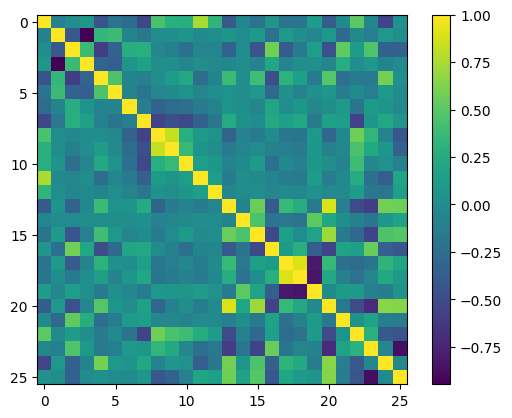

In [307]:
plot_correlation_matrix(pd_ss.corr())

In [73]:
my_scaler.inverse_transform(pd_norm)

array([[1.72853470e-06, 2.38418579e-07, 2.98023224e-07, ...,
        4.44409944e-03, 4.52172563e-03, 9.95594714e-01],
       [1.25169754e-06, 2.38418579e-07, 4.17232513e-07, ...,
        1.06336806e-02, 1.10677083e-02, 9.89583333e-01],
       [1.72853470e-06, 2.38418579e-07, 2.98023224e-07, ...,
        4.25501611e-03, 4.32622977e-03, 9.95780591e-01],
       ...,
       [1.25169754e-06, 2.38418579e-07, 5.36441803e-07, ...,
        1.75237001e-02, 1.86727952e-02, 9.83050847e-01],
       [1.72853470e-06, 2.38418579e-07, 4.17232513e-07, ...,
        1.14884484e-02, 1.19934352e-02, 9.88764045e-01],
       [7.15255737e-07, 2.38418579e-07, 2.98023224e-07, ...,
        2.00800000e-03, 2.02400000e-03, 9.98000000e-01]])

In [ ]:
### select 'k' most important features based on a scoring function with sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

#X_ne = SelectKBest(f_regression, k="all").fit_transform(features, Ne)
#X_mu = SelectKBest(f_regression, k="all").fit_transform(features, mu)

#Ne_selected_features = features.columns[SelectKBest(f_regression, k =20).fit(X, Ne).get_support()]



In [ ]:
###features, Ne, mu = pd_norm.iloc[:,:-2], pd_norm.iloc[:,-2], pd_norm.iloc[:,-1]

In [ ]:
### Calculate f-statistics



In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=pd_norm.shape[1])
pca.fit(pd_norm)

# Reformat and view results
loadings = pd.DataFrame(pca.components_.T,
                            columns=['PC%s' % _ for _ in range(len(pd_norm.columns))],
                            index=pd_norm.columns)
print(loadings)

plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

In [ ]:
sum(pca.explained_variance_ratio_[:25])

In [ ]:
### Model trials

In [ ]:
!pip install torch

In [7]:
import torch
from torch import nn
from torch.utils.data import DataLoader, random_split
import math

In [8]:
batch_size = 128
#batch_size = 64
#batch_size = 8

In [9]:

df_t = torch.tensor(pd_norm.values, dtype=torch.float32, device="cpu")
training_data_fw, test_data_fw = random_split(df_t, [0.75, 0.25])
train_dataloader = DataLoader(training_data_fw, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data_fw, batch_size=batch_size)

In [241]:
##### Create Models

In [10]:
## GELU

device = "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self, n_inputs, n_outputs):
        super().__init__()
        #self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(n_inputs, n_inputs*4),
            nn.GELU(),
            nn.Linear(n_inputs*4, n_inputs*2),
            nn.GELU(),
            nn.Linear(n_inputs*2, n_outputs*4),
            #nn.Linear(n_inputs//2, n_outputs*2),
            #nn.Tanh(),
            nn.GELU(),
            nn.Linear(n_outputs*4, n_outputs),
            nn.GELU()
            #nn.Linear(n_inputs*2, n_outputs)

        )

    def forward(self, x):
        #x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork(pd_norm.iloc[:,:-2].shape[1], 2).to(device)
#model = NeuralNetwork(41, 2).to(device)
print(model)

Using cpu device
NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=24, out_features=96, bias=True)
    (1): GELU(approximate='none')
    (2): Linear(in_features=96, out_features=48, bias=True)
    (3): GELU(approximate='none')
    (4): Linear(in_features=48, out_features=8, bias=True)
    (5): GELU(approximate='none')
    (6): Linear(in_features=8, out_features=2, bias=True)
    (7): GELU(approximate='none')
  )
)


In [ ]:
m = nn.GELU()
input = torch.randn(2)
output = m(input)

In [262]:
# Get cpu, gpu or mps device for training.
"""device = ( ### Raises problems with Apple's architecture
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)"""
device = "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self, n_inputs, n_outputs):
        super().__init__()
        #self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(n_inputs, n_inputs*4),
            nn.ReLU(),
            nn.Linear(n_inputs*4, n_inputs*2),
            nn.ReLU(),
            nn.Linear(n_inputs*2, n_outputs*4),
            #nn.Linear(n_inputs//2, n_outputs*2),
            #nn.Tanh(),
            nn.ReLU(),
            nn.Linear(n_outputs*4, n_outputs),
            #nn.ReLU()
            #nn.GELU()
            #nn.Linear(n_inputs*2, n_outputs)

        )

    def forward(self, x):
        #x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork(pd_norm.iloc[:,:-2].shape[1], 2).to(device)
#model = NeuralNetwork(41, 2).to(device)
print(model)

Using cpu device
NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=24, out_features=96, bias=True)
    (1): ReLU()
    (2): Linear(in_features=96, out_features=48, bias=True)
    (3): ReLU()
    (4): Linear(in_features=48, out_features=8, bias=True)
    (5): ReLU()
    (6): Linear(in_features=8, out_features=2, bias=True)
  )
)


In [212]:
#### Optimizing the Model Parameters

In [11]:
#loss_fn = nn.L1Loss()
#loss_fn = nn.MSELoss()
loss_fn = nn.HuberLoss()
#optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)
optimizer = torch.optim.Adamax(model.parameters(), lr=1e-3)
#optimizer = torch.optim.Adam(model.parameters())

In [12]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, data in enumerate(train_dataloader):
        ## y includes y_ne, y_mu
        X, y = data[:,:-2], data[:,-2:]
        #Calculate for effective population first
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 1000 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [13]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for data in dataloader:
            X, y = data[:,:-2], data[:,-2:]
            #Calculate for effective population first
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (np.isclose(pred,y)).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return test_loss

In [299]:
device = "cpu"

In [15]:
%timeit
print("dadada")

dadada


In [14]:
epochs = 200
test_loss_lst = []
train_loss_lst = []
for t in range(epochs):
    if t%25 == 0:
        print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    ##Train set loss
    train_loss_lst.append(test(train_dataloader, model, loss_fn))
    ## Test set loss
    test_loss_lst.append(test(test_dataloader, model, loss_fn))

print("Final train and test loss")
test(train_dataloader, model, loss_fn)
test_loss_lst.append(test(test_dataloader, model, loss_fn))
print("Done!")

Epoch 1
-------------------------------
loss: 0.138271  [  128/ 7498]
Test Error: 
 Accuracy: 0.0%, Avg loss: 0.038935 

Test Error: 
 Accuracy: 0.0%, Avg loss: 0.039898 

loss: 0.040356  [  128/ 7498]
Test Error: 
 Accuracy: 0.0%, Avg loss: 0.026546 

Test Error: 
 Accuracy: 0.0%, Avg loss: 0.027509 

loss: 0.027071  [  128/ 7498]
Test Error: 
 Accuracy: 0.0%, Avg loss: 0.023156 

Test Error: 
 Accuracy: 0.0%, Avg loss: 0.024163 

loss: 0.019597  [  128/ 7498]
Test Error: 
 Accuracy: 0.0%, Avg loss: 0.021755 

Test Error: 
 Accuracy: 0.0%, Avg loss: 0.022693 

loss: 0.021720  [  128/ 7498]
Test Error: 
 Accuracy: 0.0%, Avg loss: 0.019576 

Test Error: 
 Accuracy: 0.0%, Avg loss: 0.020399 

loss: 0.019122  [  128/ 7498]
Test Error: 
 Accuracy: 0.0%, Avg loss: 0.016921 

Test Error: 
 Accuracy: 0.0%, Avg loss: 0.017577 

loss: 0.016753  [  128/ 7498]
Test Error: 
 Accuracy: 0.0%, Avg loss: 0.015192 

Test Error: 
 Accuracy: 0.0%, Avg loss: 0.015720 

loss: 0.014502  [  128/ 7498]
Test E

Text(0.5, 1.0, 'test_loss')

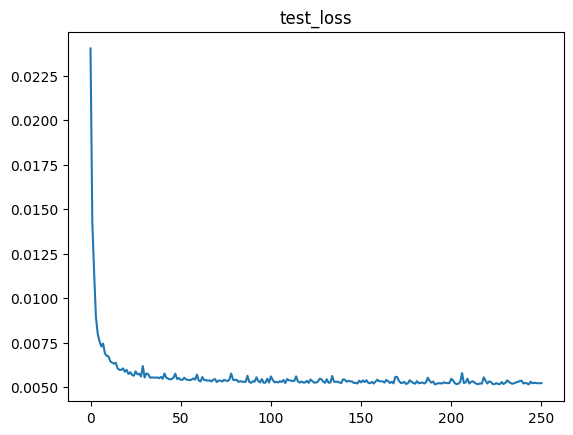

In [268]:
plt.plot(test_loss_lst)
plt.title("test_loss")
### Shows average test loss per batch
## x-axis number of epochs

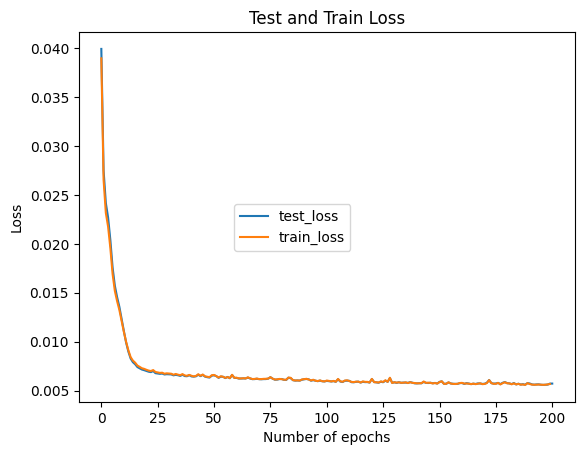

In [15]:
fig, ax = plt.subplots()
ax.plot(test_loss_lst, label="test_loss")
ax.plot(train_loss_lst, label="train_loss")
ax.set(title='Test and Train Loss',xlabel='Number of epochs',ylabel='Loss')

fig.legend(loc="center")

In [16]:
def get_r2_array(dataloader,model, scaler, n_batches=1, plot=False):
    from sklearn.metrics import r2_score
    model.eval()
    if plot:
        plt.ion()
        plt.figure(figsize=(15, 18))
        figure, (ax_ne, ax_mu) = plt.subplots(nrows=2)
        #fig_countour, (ax_con_ne, ax_con_mu) = plt.subplots(nrows=2)
        #figure_hexbin, ax_hxbin = plt.subplot()
    with torch.no_grad():
        values_array = np.zeros([n_batches, 4+2, batch_size])
        ne_r2_avg = 0
        mu_r2_avg = 0
        for counter, data in enumerate(dataloader):
            if counter+1 > n_batches:
                break
            X, y = data[:,:-2], data[:,-2:]
            pred = model(X)

            ##Rescale the inputs to original values
            y_true_trans = scaler.inverse_transform(data)[:,-2:]
            y_hat_trans =  scaler.inverse_transform(np.c_[X,pred])[:,-2:]
            ne_t, ne_p =  y_true_trans[:,0], y_hat_trans[:,0]
            mu_t, mu_p =  y_true_trans[:,1], y_hat_trans[:,1]

            ne_msd = (1/batch_size)*((ne_t/np.linalg.norm(ne_t))-(ne_p/np.linalg.norm(ne_p)))**2
            ne_r2 = r2_score(ne_t, ne_p)
            ne_r2_avg += ne_r2
            mu_msd = (1/batch_size)*((mu_t/np.linalg.norm(mu_t))-(mu_p/np.linalg.norm(mu_p)))**2
            mu_r2 = r2_score(mu_t, mu_p)
            mu_r2_avg += mu_r2


            #values_array[counter,:,:] = ne_t, ne_p, mu_t, mu_p, ne_r2, mu_r2

            if plot:
                ax_ne.scatter(ne_t, ne_p, alpha=0.7)#, label=f"batch_number {counter}")
                ax_mu.scatter(mu_t, mu_p, alpha=0.7)
                # drawing updated values
                figure.canvas.draw()
                # This will run the GUI event
                # loop until all UI events
                # currently waiting have been processed
                figure.canvas.flush_events()

        print(f"number of last batch {counter}")
        ne_r2_avg = ne_r2_avg / counter
        ax_ne.annotate(f"r-squared = {ne_r2_avg.__round__(3)}", (0,999))
        ax_ne.plot([0, 1000], [0, 1000], 'k--', lw=3, label="Identity Line")
        ax_ne.plot(np.linspace(0,1000, 1000)*ne_r2_avg, 'r--', lw=3, label="R^2 Line")
        ax_ne.set(title='Effective Population Size',xlabel='Ne True Values',ylabel='Ne Predicted Values')

        mu_r2_avg = mu_r2_avg/counter
        ax_mu.annotate(f"r-squared = {mu_r2_avg.__round__(3)}", (0,0.9))
        ax_mu.plot([0,1], [0,1], 'k--', lw=3)
        ax_mu.plot(np.linspace(0,1), np.linspace(0,1)*mu_r2_avg, 'r--', lw=3)
        ax_mu.set(title='Mutation Rate',xlabel='Mu True Values',ylabel='Mu Predicted Values')

        figure.legend(loc="center left", framealpha=0.4, borderpad=0.4)
        figure.tight_layout()


#return values_array

number of last batch 10


<Figure size 1500x1800 with 0 Axes>

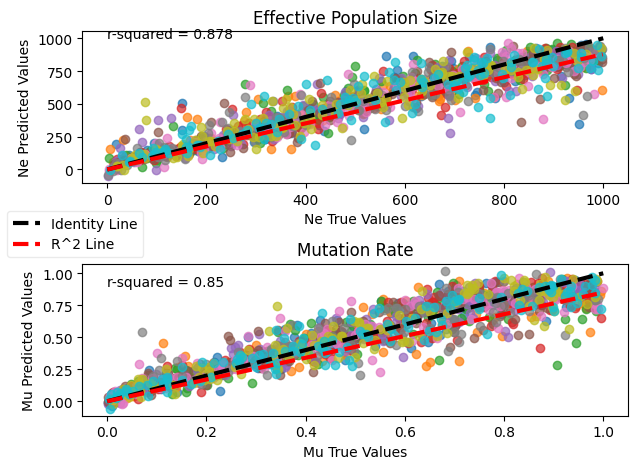

In [20]:
r2_array = get_r2_array(dataloader=test_dataloader, model=model, n_batches=10, scaler=my_scaler, plot=True)

In [ ]:
def plot_predictions(ne_t, ne_p, mu_t, mu_p, b_number, started=False):
    ...

In [ ]:
plot_predictions(dataloader=test_dataloader, model=model, scaler=my_scaler, n_batches_to_plot=5)
## Each colour represnts batch_number

In [ ]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

def plot_error_contour(data, scaler=None):
    ne_t = np.linspace(data[:,0,:].min(), data[:,0,:].max(), 100)
    ne_p = np.linspace(data[:,1,:].min(), data[:,1,:].max(), 100)
    mu_t = np.linspace(data[:,2,:].min(), data[:,2,:].max(), 100)
    mu_p = np.linspace(data[:,3,:].min(), data[:,3,:].max(), 100)

    dim1, dim2 = np.meshgrid(ne_t, ne_p)
    mesh_df = np.array([data[:,0,:].mean(axis=0) for i in range(dim1.size)])
    mesh_df[:,1] = dim1.ravel()
    mesh_df[:,2] = dim2.ravel()

    Z = regressor.predict(mesh_df).reshape(dim1.shape)

    fig, ax = plt.subplots()

    ax.contourf(dim1, dim2, Z)
    ax.set_title('Filled Contour Plot')
    ax.set_xlabel('SiO2/Al2O3')
    ax.set_ylabel('Precursor/Aggregate')
    plt.show()


In [ ]:
##TODO: Implement optimazation for hyper-parameters

In [ ]:
##TODO: plot the predicted and actual values, plot loss

In [ ]:
##TODO: hexbin y --> predicted - true value x --> error
##TODO: y eksenine --> (prediction - error)
##TODO: x eksenin --> (prediction - actual)

In [22]:
#### Save Model
torch.save(model.state_dict(), "adamax_huber_200epochs_gelu_model.pth")
print("Saved PyTorch Model State")

Saved PyTorch Model State


In [ ]:
### Load Model
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth"))

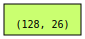

In [31]:
## Illustrate the model
from torchviz import make_dot
all_dat = [dat for dat in test_dataloader]
x = all_dat[0]
make_dot(x, params=dict(model.named_parameters()))
